In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/home/jlee782/crowd-seg/analysis/TileEM


In [3]:
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj

In [4]:
import json

In [6]:
from test_sample import test_sample_obj
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47]

In [19]:
def compute_PR(mode="basic"):
    tbl = []
    sample_lst = sample_specs.keys()
    for sample_name in sample_lst:
        for objid in object_lst:
            try:
                outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample_name, objid)
                for thresh in [-1,-2,0,2,1]:
                    #if True:
                    iteration=4
                #for iteration in range(5):
                    if mode =='MV':
                        #[p,r,j] = json.loads(open(outdir+"MV_prj.json").read())
                        gt_est_mask = pkl.load(open(outdir+"MV_mask.pkl"))
                        [p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
                        tbl.append([sample_name,objid,iteration,thresh,p,r,j])
                    elif mode !="basic":
                        #gt_est_mask = pkl.load(open(outdir+"{}_gt_est_mask_{}_thresh{}.pkl".format(mode,iteration,thresh)))
                        #[p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
                        #print "Before: ",[p, r, j]
                        #with open(outdir+"{}_EM_prj_iter{}_thresh{}.json".format(mode,iteration,thresh) as fp:
                        #    fp.write(json.dumps([p, r, j]))
                        [p,r,j] = json.loads(open(outdir+"{}_EM_prj_iter{}_thresh{}.json".format(mode,iteration,thresh)).read())
                        #print "After: ",[p, r, j]
                        tbl.append([sample_name,objid,iteration,thresh,p,r,j])
                    else:
                        if thresh in [-2,0,2]:
                            #gt_est_mask = pkl.load(open(outdir+"gt_est_mask_{}_thresh{}.pkl".format(iteration,thresh)))
                            #[p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
                            #with open(outdir+"EM_prj_thresh{}.json".format(thresh),'w') as fp:
                            #    fp.write(json.dumps([p, r, j]))
                            #print "Before: ",[p, r, j]
                            [p,r,j] = json.loads(open(outdir+"EM_prj_thresh{}.json".format(thresh)).read())
                            #print "After: ",[p, r, j]
                            tbl.append([sample_name,objid,4,thresh,p,r,j])
            except(IOError):
                #No file
                #print "Missing:",sample_name,objid
                pass
    df = pd.DataFrame(tbl,columns=["sample_name",'objid','iteration','thresh','P [{}]'.format(mode),'R [{}]'.format(mode),'J [{}]'.format(mode)])
    return df

In [ ]:
df_all = compute_PR(mode="basic")
for mode in  ["GT","isoGT","GTLSA","isoGTLSA","MV"]:
    modedf = compute_PR(mode=mode)
    df_all = df_all.merge(modedf)

In [300]:
df_all = df_all.drop_duplicates()

In [302]:
df = df_all[(df_all["iteration"]==4) ]

In [304]:
df.filter(regex="J").mean()

J [basic]       0.849444
J [GT]          0.862836
J [isoGT]       0.840654
J [GTLSA]       0.819265
J [isoGTLSA]    0.830122
J [MV]          0.850464
dtype: float64

In [306]:
df.filter(regex="J").std()

J [basic]       0.115867
J [GT]          0.093261
J [isoGT]       0.137417
J [GTLSA]       0.117986
J [isoGTLSA]    0.156437
J [MV]          0.115428
dtype: float64

if eliminate bad objects, then some of the J scores increases

In [337]:
df = df_all[(df_all["iteration"]==4) &(~df_all["objid"].isin([35,40,41]))]

In [339]:
df.mean()

objid           21.156250
iteration        4.000000
thresh           0.000000
P [basic]        0.938547
R [basic]        0.901797
J [basic]        0.849444
P [GT]           0.901109
R [GT]           0.957176
J [GT]           0.862836
P [isoGT]        0.913661
R [isoGT]        0.918167
J [isoGT]        0.840654
P [GTLSA]        0.876668
R [GTLSA]        0.928557
J [GTLSA]        0.819265
P [isoGTLSA]     0.904500
R [isoGTLSA]     0.913922
J [isoGTLSA]     0.830122
P [MV]           0.942808
R [MV]           0.898782
J [MV]           0.850464
dtype: float64

In [338]:
df.filter(regex="J").mean()

J [basic]       0.849444
J [GT]          0.862836
J [isoGT]       0.840654
J [GTLSA]       0.819265
J [isoGTLSA]    0.830122
J [MV]          0.850464
dtype: float64

In [310]:
df.filter(regex="J").std()

J [basic]       0.115867
J [GT]          0.093261
J [isoGT]       0.137417
J [GTLSA]       0.117986
J [isoGTLSA]    0.156437
J [MV]          0.115428
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15b4a9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x16d50310>]], dtype=object)

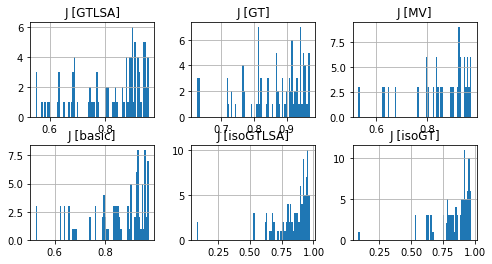

In [327]:
fig = plt.figure()
df.filter(regex="J").hist(bins=80,layout=(2,3),figsize=(8,4))

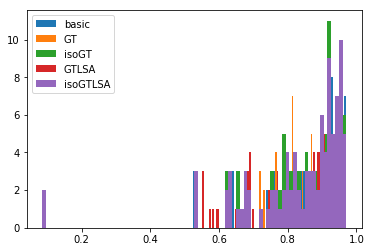

In [335]:
a = plt.hist(df["J [basic]"],label="basic",bins=80)
a = plt.hist(df["J [GT]"],label="GT",bins=80)
a = plt.hist(df["J [isoGT]"],label="isoGT",bins=80)
a = plt.hist(df["J [GTLSA]"],label="GTLSA",bins=80)
a = plt.hist(df["J [isoGTLSA]"],label="isoGTLSA",bins=80)
plt.legend()

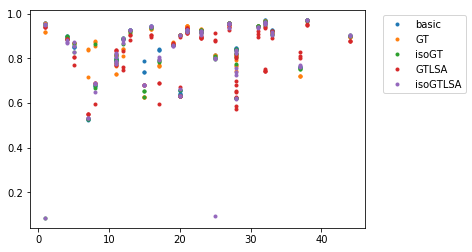

In [336]:
a = plt.plot(df["objid"],df["J [basic]"],'.',label="basic")
a = plt.plot(df["objid"],df["J [GT]"],'.',label="GT" )
a = plt.plot(df["objid"],df["J [isoGT]"],'.',label="isoGT" )
a = plt.plot(df["objid"],df["J [GTLSA]"],'.',label="GTLSA" )
a = plt.plot(df["objid"],df["J [isoGTLSA]"],'.',label="isoGTLSA" )
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [334]:
df[df["J [isoGTLSA]"]<0.3]

,sample_name,objid,iteration,thresh,P [basic],R [basic],J [basic],P [GT],R [GT],J [GT],...,J [isoGT],P [GTLSA],R [GTLSA],J [GTLSA],P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],P [MV],R [MV],J [MV]
24,5workers_rand0,1,4,-2,0.977603,0.980179,0.958651,0.925597,0.990605,0.917542,...,0.085016,0.951557,0.989497,0.942043,0.085066,0.995264,0.085032,0.977603,0.980179,0.958651
33,10workers_rand4,25,4,-2,0.973644,0.831458,0.813156,0.964084,0.839170,0.813731,...,0.809798,0.895606,0.975885,0.876214,0.096564,0.839539,0.094814,0.981550,0.817119,0.804759


In [226]:
def plot_MV_EM_mask(object_id,Nworker,batch_num,mode,thresh,iteration):
    
    if iteration==0:    
        plt.figure()
        plt.title("MV mask")
        MV_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/MV_mask.pkl".format(Nworker,batch_num,object_id)))
        plt.imshow(MV_mask,cmap=mpl.cm.jet_r,interpolation=None)
        plt.colorbar()
        plt.figure()
        plt.title("Megamask")
        Mega_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/mega_mask.pkl".format(Nworker,batch_num,object_id)))
        plt.imshow(Mega_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
        plt.colorbar()
    
    EM_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}gt_est_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.figure()
    plt.title("EM mask iter#{}".format(iteration))    
    plt.imshow(EM_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

    plt.figure()
    plt.title("pInT iter#{}".format(iteration))
    pInT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}p_in_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.imshow(pInT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()
    
    plt.figure()
    plt.title("pNotInT iter#{}".format(iteration))
    pnot_InT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}p_not_in_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.imshow(pnot_InT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

only the last mask was stored for GTLSA 

In [238]:
!cat pixel_em/5workers_rand0/obj1/isoGTLSA_EM_prj_iter0_thresh-2.json 

[0.9250473366439212, 0.9888863428047663, 0.9155293119298493]

In [239]:
!cat pixel_em/5workers_rand0/obj1/isoGTLSA_EM_prj_iter1_thresh-2.json

[0.921120766093279, 0.9918652612282309, 0.9142143058293438]

In [240]:
!cat pixel_em/5workers_rand0/obj1/isoGTLSA_EM_prj_iter2_thresh-2.json

[0.9179088661250442, 0.9924381301558204, 0.9115336046022169]

Something bad happened here. 

In [241]:
!cat pixel_em/5workers_rand0/obj1/isoGTLSA_EM_prj_iter3_thresh-2.json

[0.08506610086502367, 0.9952642835319279, 0.08503168294863513]

In [242]:
!cat pixel_em/5workers_rand0/obj1/isoGTLSA_EM_prj_iter4_thresh-2.json

[0.08506610086502367, 0.9952642835319279, 0.08503168294863513]

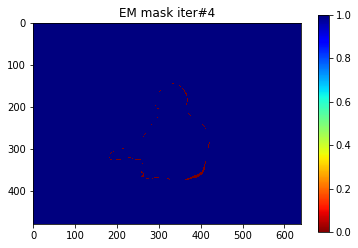

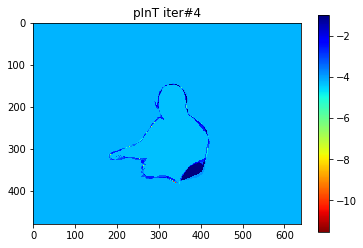

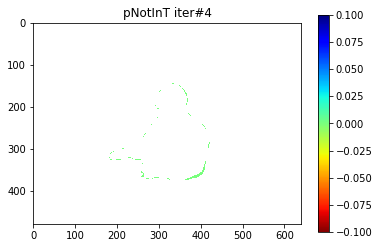

In [232]:
plot_MV_EM_mask(1,5,0,'isoGTLSA_',-2,4)

I reran this with storing outputs at every iteration 

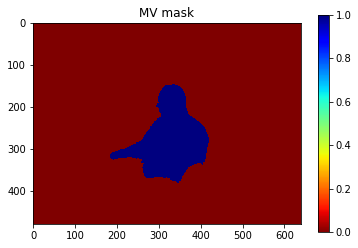

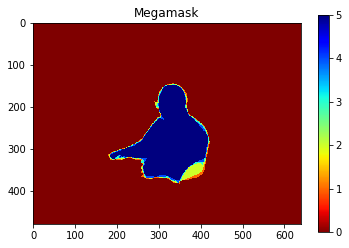

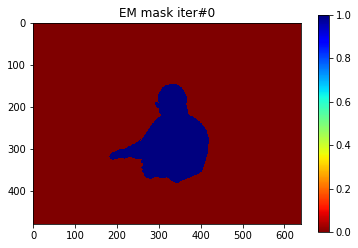

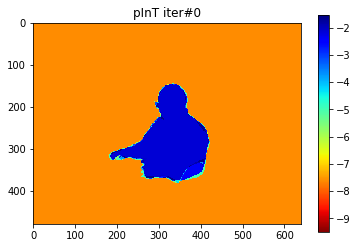

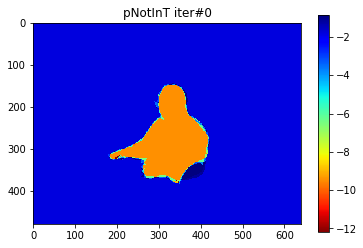

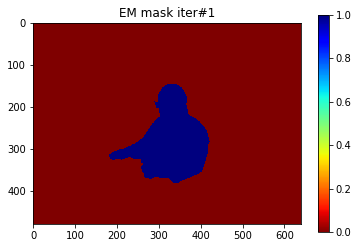

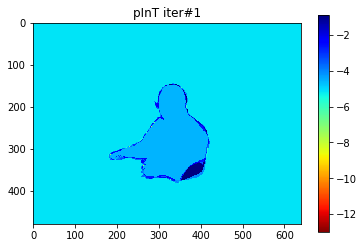

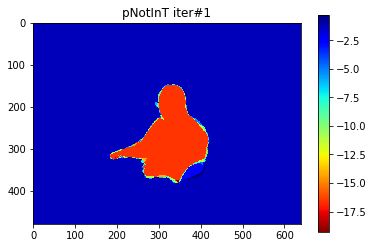

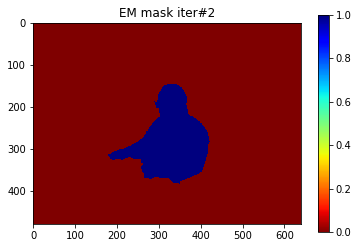

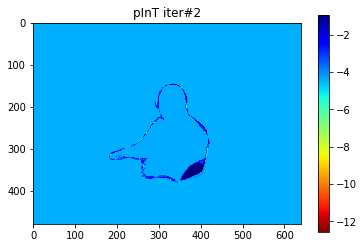

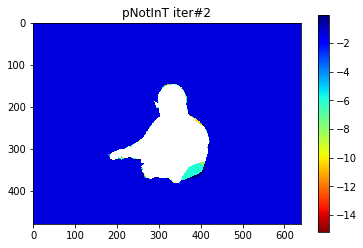

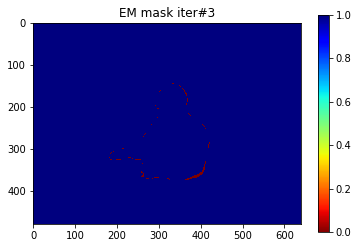

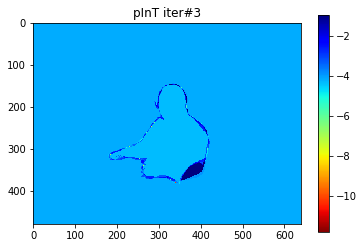

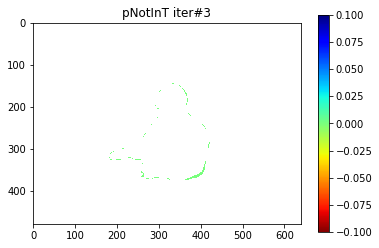

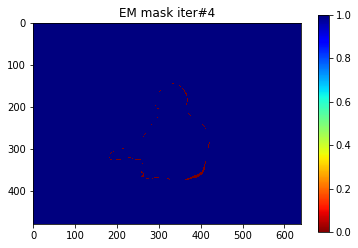

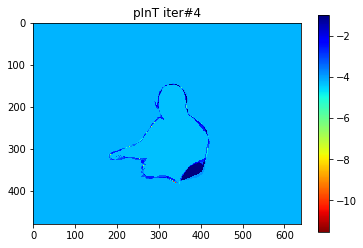

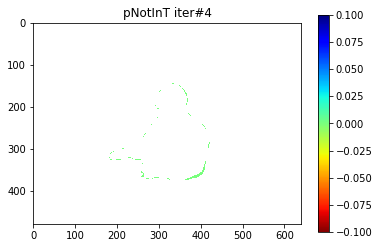

In [245]:
for iteration in range(5):
    plot_MV_EM_mask(1,5,0,'isoGTLSA_',-2,iteration)

#### If we only look at "good objects", ones with jaccard >0.6 then what would the average look like (i.e. filter out things that has gone terribly wrong, and how many are there)

In [340]:
len(df)

96

In [341]:
(df[Jkeys]>0.6).sum()

J [basic]       93
J [GT]          96
J [isoGT]       92
J [GTLSA]       89
J [isoGTLSA]    91
dtype: int64

In [342]:
df[(df[Jkeys]>0.5).sum(axis=1)==5].filter(regex='J').mean()

J [basic]       0.848669
J [GT]          0.862776
J [isoGT]       0.849021
J [GTLSA]       0.817353
J [isoGTLSA]    0.845871
J [MV]          0.849799
dtype: float64

#### Places where  GTLSA is doing badly is when everyone else also does badly 

- object 35 was supposed to be eliminated anyways 

In [343]:
df[df["J [isoGTLSA]"]<0.5]

,sample_name,objid,iteration,thresh,P [basic],R [basic],J [basic],P [GT],R [GT],J [GT],...,J [isoGT],P [GTLSA],R [GTLSA],J [GTLSA],P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],P [MV],R [MV],J [MV]
24,5workers_rand0,1,4,-2,0.977603,0.980179,0.958651,0.925597,0.990605,0.917542,...,0.085016,0.951557,0.989497,0.942043,0.085066,0.995264,0.085032,0.977603,0.980179,0.958651
33,10workers_rand4,25,4,-2,0.973644,0.831458,0.813156,0.964084,0.839170,0.813731,...,0.809798,0.895606,0.975885,0.876214,0.096564,0.839539,0.094814,0.981550,0.817119,0.804759


In [399]:
df_dropped_bad_isoGTLSA = df.drop([24,33])

df_dropped_bad_isoGTLSA.filter(regex='J').mean()

J [basic]       0.848669
J [GT]          0.862776
J [isoGT]       0.849021
J [GTLSA]       0.817353
J [isoGTLSA]    0.845871
J [MV]          0.849799
dtype: float64

#### Ranking Jaccard 

In [396]:
Jkeys = df.keys()[df.keys().str.contains('J')]

rank_df = df[df["thresh"]==0][Jkeys].rank(axis=1,ascending=False,method="average")

rank_df.mean()

J [basic]       2.781250
J [GT]          3.578125
J [isoGT]       3.578125
J [GTLSA]       4.343750
J [isoGTLSA]    3.812500
J [MV]          2.906250
dtype: float64

In [397]:
df[df["thresh"]==0][Jkeys].head()

,J [basic],J [GT],J [isoGT],J [GTLSA],J [isoGTLSA],J [MV]
1,0.677618,0.877325,0.681983,0.691184,0.687738,0.675043
4,0.658310,0.906054,0.906054,0.904175,0.903235,0.648100
7,0.642501,0.633076,0.633076,0.633076,0.633076,0.633076
10,0.624637,0.821642,0.624637,0.655347,0.624432,0.624637
13,0.526338,0.839683,0.530529,0.550199,0.534666,0.529607


In [398]:
df[df["thresh"]==0][Jkeys].rank(axis=1,ascending=False,method="average").head()

,J [basic],J [GT],J [isoGT],J [GTLSA],J [isoGTLSA],J [MV]
1,5,1.0,4.0,2,3,6
4,5,1.5,1.5,3,4,6
7,1,4.0,4.0,4,4,4
10,4,1.0,4.0,2,6,4
13,6,1.0,4.0,2,3,5


The basic model generally does better than the other models then GT, then ISOGT ..etc 

#### Count how many GTLSA > basic 

Larger J values corresponds to rank=1 and lower --> rank=2. So lower counts of rank is better.  

In [454]:
# df[['J [basic]','J [GTLSA]']].head()

# df[['J [basic]','J [GTLSA]']].rank(axis=1,ascending=False,method="average").head()

In [455]:
df[['J [basic]','J [GTLSA]']].rank(axis=1,ascending=False,method="average").sum()

J [basic]    124
J [GTLSA]    164
dtype: float64

In [456]:
df[['J [basic]','J [GT]']].rank(axis=1,ascending=False,method="average").sum()

J [basic]    129.5
J [GT]       158.5
dtype: float64

In [457]:
df[['J [GT]','J [GTLSA]']].rank(axis=1,ascending=False,method="average").sum()

J [GT]       119.5
J [GTLSA]    168.5
dtype: float64

#### x: sample (ordered by number of workers) v.s. y: Jaccard (for GTLSA/ basic )(do for PRJ and x as samples / obj aggregation)

In [415]:
df["Nworkers"]=df["sample_name"].apply(lambda x: int(x.split('w')[0]))

In [442]:
def plot_comparison(x_attr,y1_attr,y2_attr):
    if x_attr=="index":
        a = plt.plot(df.index,df[y1_attr],'.',label=y1_attr)
        a = plt.plot(df.index,df[y2_attr],'x',label=y2_attr )
    else:
        a = plt.plot(df[x_attr],df[y1_attr],'.',label=y1_attr)
        a = plt.plot(df[x_attr],df[y2_attr],'x',label=y2_attr )
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel(x_attr)

In [435]:
def compare_PRJ_fixedNworkers(y1,y2):
    plt.figure()
    plot_comparison("Nworkers","P [{}]".format(y1),"P [{}]".format(y2))
    plt.figure()
    plot_comparison("Nworkers","R [{}]".format(y1),"R [{}]".format(y2))
    plt.figure()
    plot_comparison("Nworkers","J [{}]".format(y1),"J [{}]".format(y2))

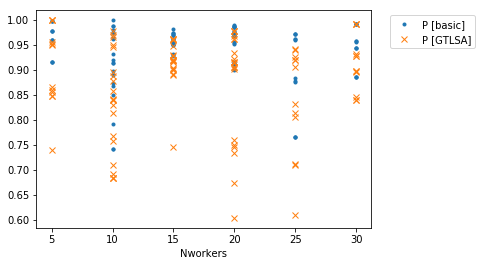

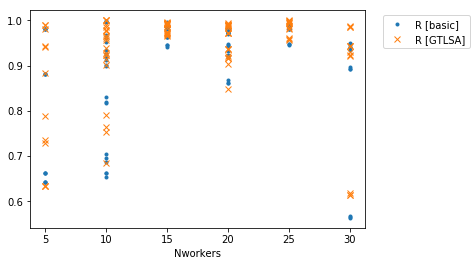

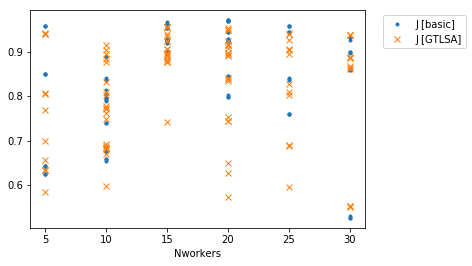

In [436]:
compare_PRJ_fixedNworkers('basic','GTLSA')

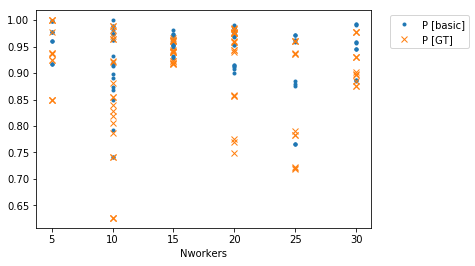

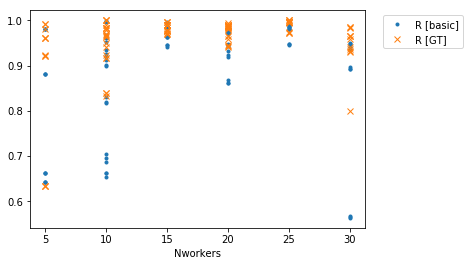

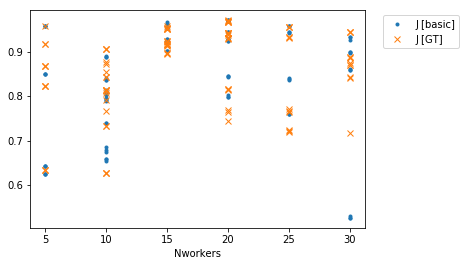

In [437]:
compare_PRJ_fixedNworkers('basic','GT')

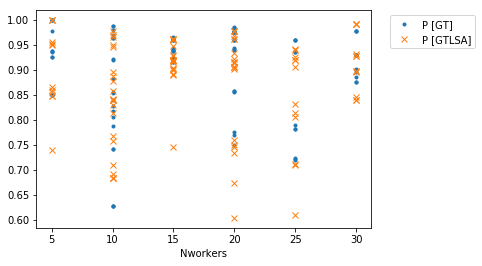

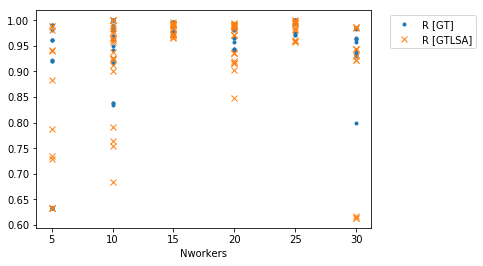

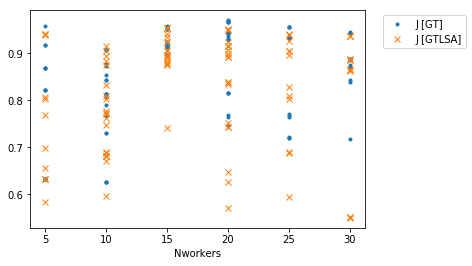

In [438]:
compare_PRJ_fixedNworkers('GT','GTLSA')

plotting every sample-object on the x axis 

In [443]:
def compare_PRJ_fixed_sample_object(y1,y2):
    plt.figure()
    plot_comparison("index","P [{}]".format(y1),"P [{}]".format(y2))
    plt.figure()
    plot_comparison("index","R [{}]".format(y1),"R [{}]".format(y2))
    plt.figure()
    plot_comparison("index","J [{}]".format(y1),"J [{}]".format(y2))

multiple does refers to different consecutive thresholds , plotting every sample,object, threshold pair

It looks like that the basic is consistently better than the variant models

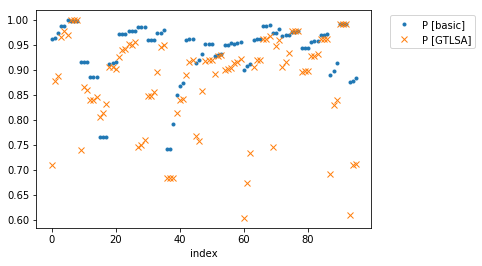

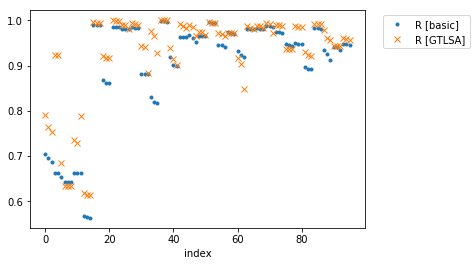

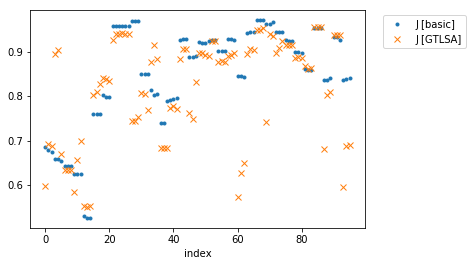

In [448]:
compare_PRJ_fixed_sample_object('basic','GTLSA')

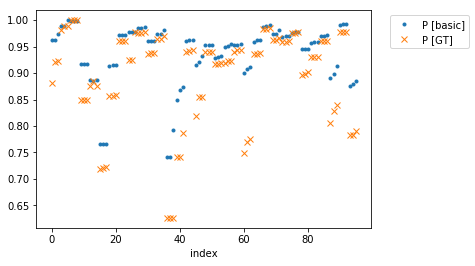

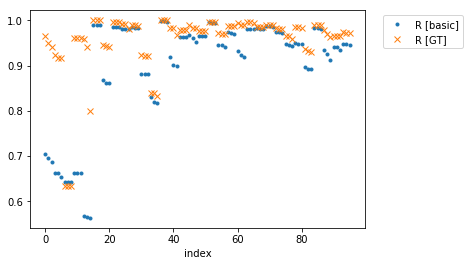

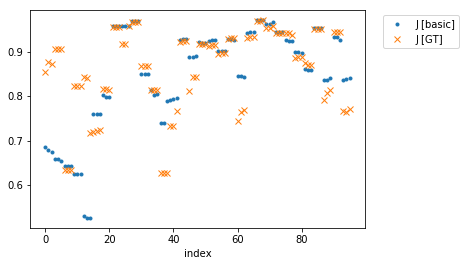

In [447]:
compare_PRJ_fixed_sample_object('basic','GT')

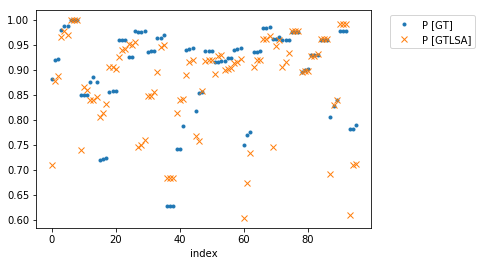

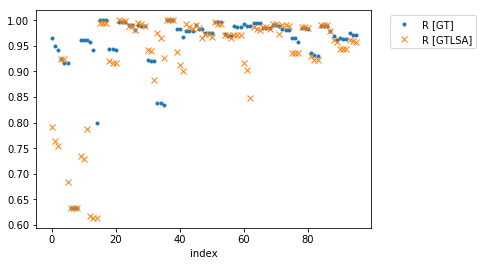

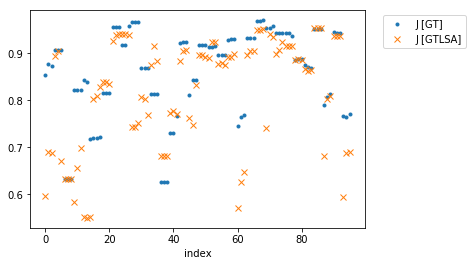

In [444]:
compare_PRJ_fixed_sample_object('GT','GTLSA')

#### Choosing the best Jaccard threshold for every sample object

In [380]:
# for sample in list(set(df["sample_name"])):
#     for objid in list(set(df["objid"])):
best_thresh_tbl = pd.DataFrame()
for test_sample in test_sample_obj:
    sample_name= test_sample[0]
    objid = test_sample[1]
    filtered_df=df[(df["sample_name"]==sample_name)&(df["objid"]==objid)]
    for attr in Jkeys:
        best_thresh_data = filtered_df[filtered_df[attr]==filtered_df[attr].max()]
        best_thresh_tbl =pd.concat([best_thresh_tbl,best_thresh_data])

In [382]:
# best_thresh_tbl

In [366]:
# df.groupby(['sample_name','objid',"thresh"])[Jkeys].apply(max)

------------------------------------------------------------------------------

In [30]:
def plot_Qj_evolution(object_id,Nworker,batch_num,mode=""):
    Qj0 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_0_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    Qj1 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_1_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    Qj2 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_2_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    Qj3 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_3_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    Qj4 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_4_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))

    Qjs = Qj0
    for wid in Qj0.keys():
        Qjs[wid]=[Qj0[wid],Qj1[wid],Qj2[wid],Qj3[wid],Qj4[wid]]
        plt.plot(range(5),Qjs[wid],label=wid)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    return Qjs 

In [ ]:
ls pixel_em/10workers_rand5/obj8/isoGT_

In [34]:
def Qj(object_id,Nworker,batch_num,mode=""):
    Qj4 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}_4_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    return Qj4

In [236]:
Qj(8,10,5,'isoGT_qp')

{54: 0.11193024474216001,
 148: 0.05093181648080233,
 156: 0.09550183369508271,
 161: 0.01725170271686251,
 169: 0.11417558565975601,
 193: 0.06395479380285907,
 208: 0.2065339420702043,
 234: 0.24317042137564554,
 235: 0.0,
 260: 0.007297357982186962}

In [35]:
Qj(8,10,5,'isoGT_qn')

{54: 0.04739235771666596,
 148: 0.013218854932630595,
 156: 0.22901347388107282,
 161: 0.2576614102945552,
 169: 0.06647681387342202,
 193: 0.015684107621031156,
 208: 0.020784630424618523,
 234: 0.3508734645301143,
 235: 0.43235431631742255,
 260: 0.3432226803247333}

In [37]:
ls pixel_em/10workers_rand5/obj8/isop

In [200]:
def plot_MV_EM_mask(object_id,Nworker,batch_num,mode,thresh,iteration):
    
    if iteration==0:    
        plt.figure()
        plt.title("MV mask")
        MV_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/MV_mask.pkl".format(Nworker,batch_num,object_id)))
        plt.imshow(MV_mask,cmap=mpl.cm.jet_r,interpolation=None)
        plt.colorbar()
        plt.figure()
        plt.title("Megamask")
        Mega_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/mega_mask.pkl".format(Nworker,batch_num,object_id)))
        plt.imshow(Mega_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
        plt.colorbar()
    
    EM_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}gt_est_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.figure()
    plt.title("EM mask iter#{}".format(iteration))    
    plt.imshow(EM_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

    plt.figure()
    plt.title("pInT iter#{}".format(iteration))
    pInT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}p_in_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.imshow(pInT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()
    
    plt.figure()
    plt.title("pNotInT iter#{}".format(iteration))
    pnot_InT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}p_not_in_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.imshow(pnot_InT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

In [80]:
Nworker=10
batch_num=5
object_id=8
mode="isoGT_"
thresh=0
pInT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}p_in_mask_4_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,thresh)))

In [86]:
pInT_mask[180,400]

-inf

In [88]:
log(0)

-inf

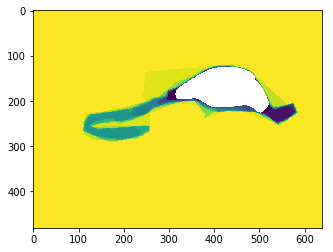

In [82]:
plt.imshow(pInT_mask)

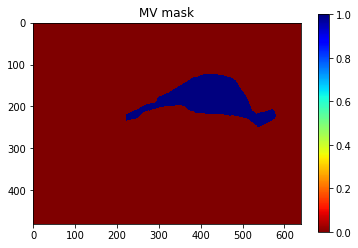

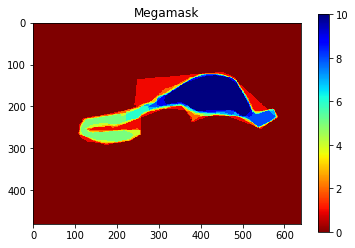

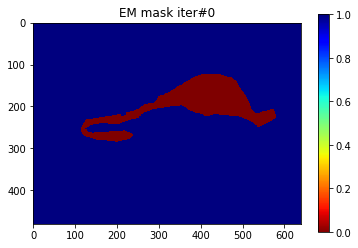

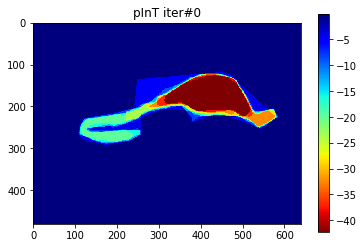

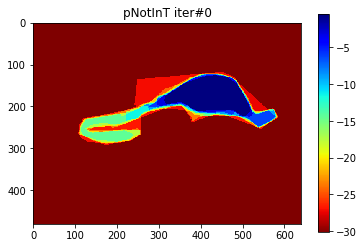

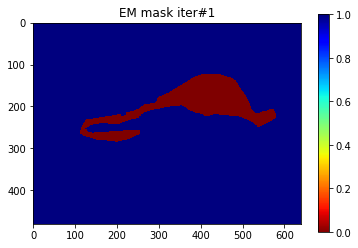

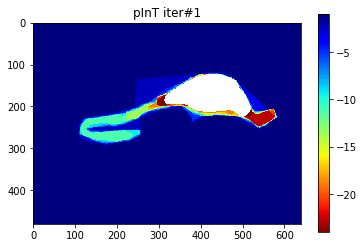

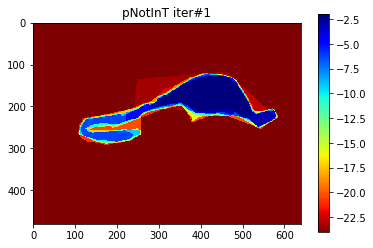

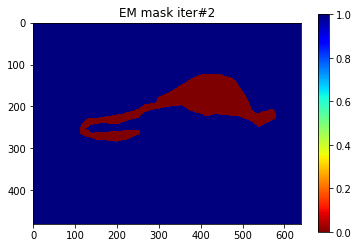

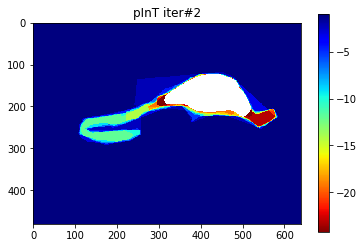

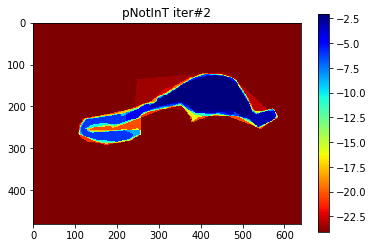

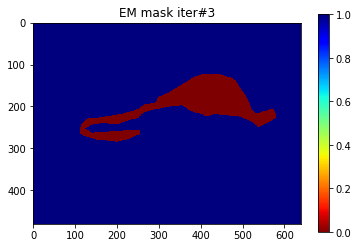

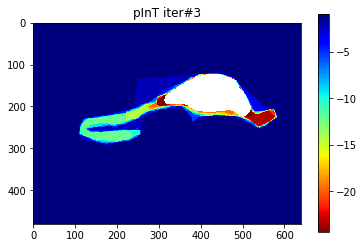

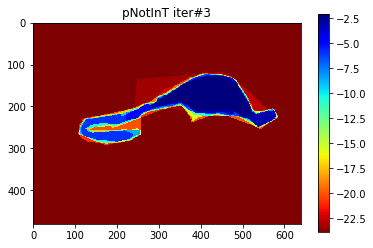

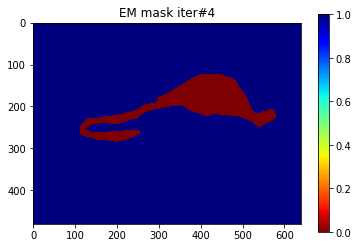

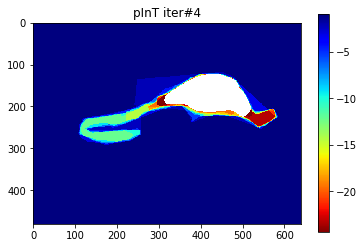

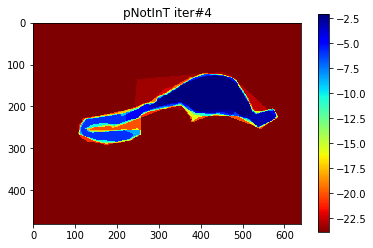

In [101]:
for iteration in range(5):
    plot_MV_EM_mask(8,10,5,'isoGT_',0,iteration)

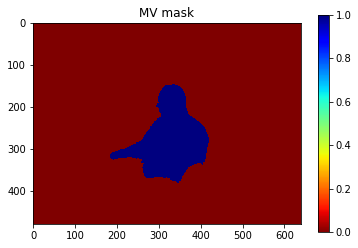

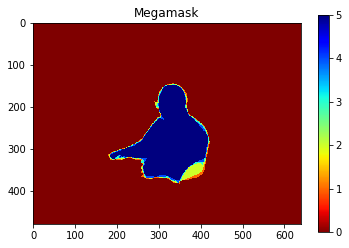

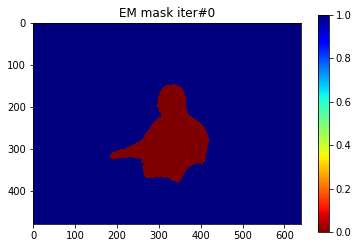

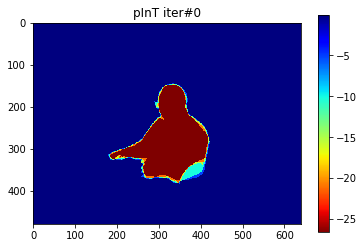

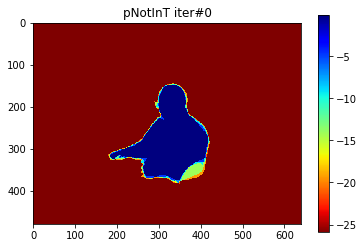

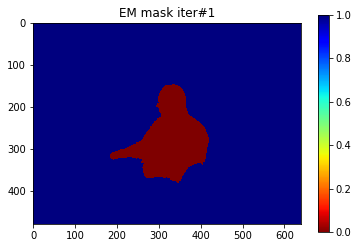

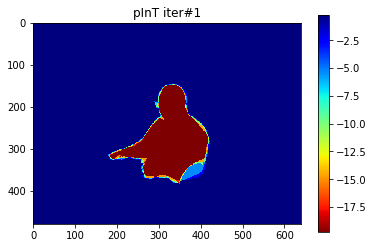

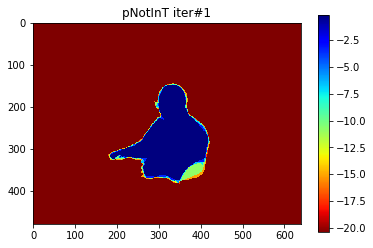

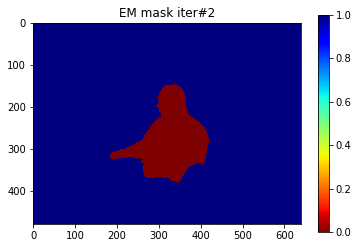

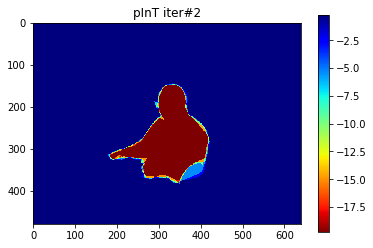

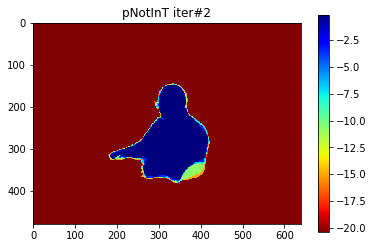

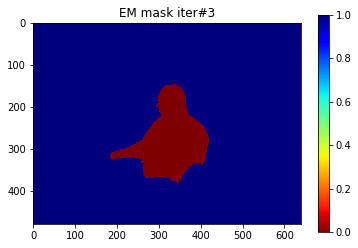

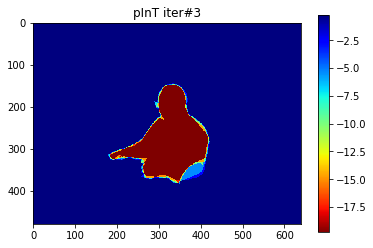

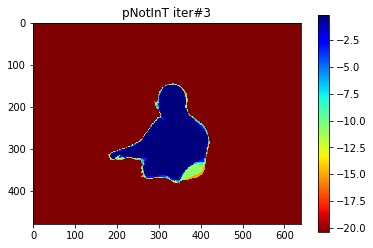

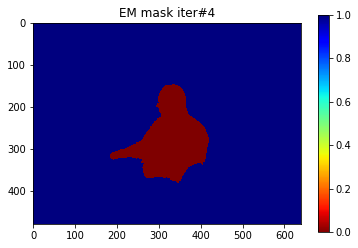

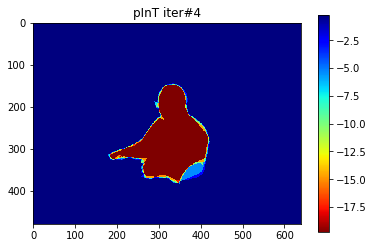

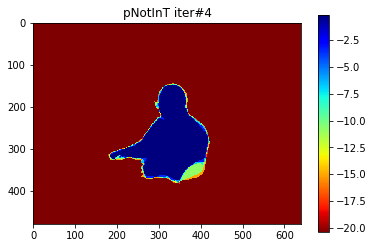

In [102]:
for iteration in range(5):
    plot_MV_EM_mask(1,5,0,'isoGT_',0,iteration)

# Ground truth worker qualities 

###### For the harder object (bag) 

GT PixelEM with iso exclusion

In [256]:
pInT = pkl.load(open("pixel_em/10workers_rand5/obj8/isoGT_p_in_mask_0_thresh-2.pkl"))
pNotInT = pkl.load(open("pixel_em/10workers_rand5/obj8/isoGT_p_in_mask_0_thresh-2.pkl"))
qp = pkl.load(open("pixel_em/10workers_rand5/obj8/isoGT_qp_4_thresh-2.pkl"))
qn = pkl.load(open("pixel_em/10workers_rand5/obj8/isoGT_qn_4_thresh-2.pkl"))

In [271]:
worker_tbl = compare_qn_qp_w_GTJaccard(8,qn,qp)

 worker_id  Precision [Self]  Recall [Self]  Jaccard [Self]        qn        qp
        54          0.932075       0.919377        0.861646  0.996771  0.661085
       148          0.918229       0.874537        0.811349  0.999408  0.601445
       156          0.885521       0.716802        0.656011  0.994031  0.900730
       161          0.948322       0.664337        0.641127  0.993006  0.895213
       193          0.932652       0.901058        0.846011  0.978689  0.612246
       169          0.919561       0.893700        0.828900  0.999947  0.518300
       208          0.828789       0.924994        0.776597  0.983325  0.926762
       234          0.721851       0.616449        0.498127  0.992967  0.877807
       235          0.998802       0.522229        0.521902  0.994002  0.921245
       260          0.989243       0.604123        0.600180  0.991804  0.714080


One run from ground truth 

In [272]:
pInT = pkl.load(open("pixel_em/10workers_rand5/obj8/p_in_mask_ground_truth_thresh-2.pkl"))
pNotInT = pkl.load(open("pixel_em/10workers_rand5/obj8/p_not_in_ground_truth_thresh-2.pkl"))
qp = pkl.load(open("pixel_em/10workers_rand5/obj8/qp_ground_truth_thresh-2.pkl"))
qn = pkl.load(open("pixel_em/10workers_rand5/obj8/qn_ground_truth_thresh-2.pkl"))

In [273]:
worker_tbl = compare_qn_qp_w_GTJaccard(8,qn,qp)

 worker_id  Precision [Self]  Recall [Self]  Jaccard [Self]        qn        qp
        54          0.932075       0.919377        0.861646  0.996771  0.661085
       148          0.918229       0.874537        0.811349  0.999408  0.601445
       156          0.885521       0.716802        0.656011  0.994031  0.900730
       161          0.948322       0.664337        0.641127  0.993006  0.895213
       193          0.932652       0.901058        0.846011  0.978689  0.612246
       169          0.919561       0.893700        0.828900  0.999947  0.518300
       208          0.828789       0.924994        0.776597  0.983325  0.926762
       234          0.721851       0.616449        0.498127  0.992967  0.877807
       235          0.998802       0.522229        0.521902  0.994002  0.921245
       260          0.989243       0.604123        0.600180  0.991804  0.714080


# Ground truth worker qualities 

###### For the easier object (man

GT PixelEM with iso exclusion

In [260]:
pInT = pkl.load(open("pixel_em/5workers_rand0/obj1/isoGT_p_in_mask_0_thresh0.pkl"))
pNotInT = pkl.load(open("pixel_em/5workers_rand0/obj1/isoGT_p_in_mask_0_thresh0.pkl"))
qp = pkl.load(open("pixel_em/5workers_rand0/obj1/isoGT_qp_4_thresh0.pkl"))
qn = pkl.load(open("pixel_em/5workers_rand0/obj1/isoGT_qn_4_thresh0.pkl"))

In [261]:
worker_tbl = compare_qn_qp_w_GTJaccard(1,qp,qn)

 worker_id  Precision [Self]  Recall [Self]  Jaccard [Self]        qn        qp
       156          0.981662       0.946002        0.929575  0.005642  0.044338
       201          0.905256       0.989745        0.896844  0.010879  0.014703
       196          0.935739       0.977213        0.915757  0.054099  0.013675
       219          0.976457       0.975077        0.952679  0.008556  0.033558
       246          0.978341       0.955855        0.936047  0.092193  0.004533


One run from ground truth 

In [262]:
pInT = pkl.load(open("pixel_em/5workers_rand0/obj1/p_in_mask_ground_truth_thresh-2.pkl"))
pNotInT = pkl.load(open("pixel_em/5workers_rand0/obj1/p_not_in_ground_truth_thresh-2.pkl"))
qp = pkl.load(open("pixel_em/5workers_rand0/obj1/qp_ground_truth_thresh-2.pkl"))
qn = pkl.load(open("pixel_em/5workers_rand0/obj1/qn_ground_truth_thresh-2.pkl"))

In [263]:
worker_tbl = compare_qn_qp_w_GTJaccard(1,qp,qn)

 worker_id  Precision [Self]  Recall [Self]  Jaccard [Self]        qn        qp
       156          0.981662       0.946002        0.929575  0.946723  0.998388
       201          0.905256       0.989745        0.896844  0.975443  0.997790
       196          0.935739       0.977213        0.915757  0.978269  0.993787
       219          0.976457       0.975077        0.952679  0.956462  0.998007
       246          0.978341       0.955855        0.936047  0.990299  0.990378


In [136]:
def plot_GT_run_mask(object_id,Nworker,batch_num,thresh):
    EM_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/gt_est_ground_truth_mask_thresh{}.pkl".format(Nworker,batch_num,object_id,thresh)))
    plt.figure()
    plt.title("EM mask")    
    plt.imshow(EM_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

    plt.figure()
    plt.title("pInT")
    pInT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/p_in_mask_ground_truth_thresh{}.pkl".format(Nworker,batch_num,object_id,thresh)))
    plt.imshow(pInT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

    plt.figure()
    plt.title("pNotInT")
    pnot_InT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/p_not_in_ground_truth_thresh{}.pkl".format(Nworker,batch_num,object_id,thresh)))
    plt.imshow(pnot_InT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

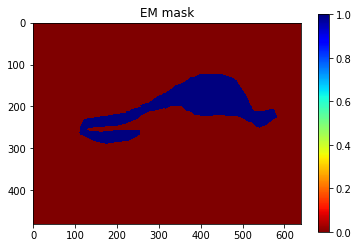

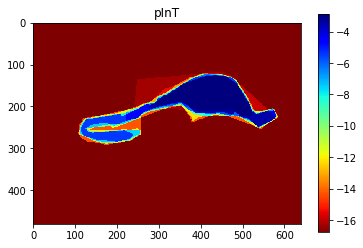

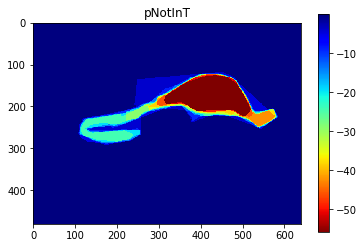

In [145]:
plot_GT_run_mask(8,10,5,-2)

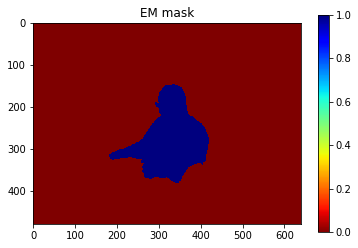

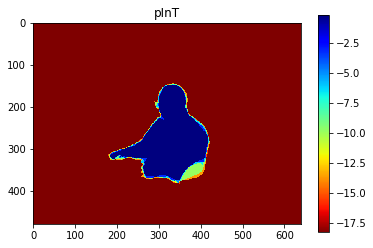

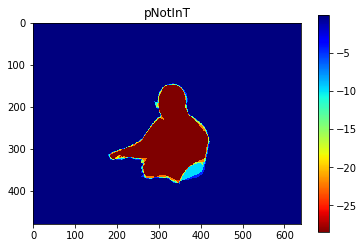

In [138]:
plot_GT_run_mask(1,5,0,0)

In [161]:
mode="Ground truth run"
test_sample_obj = [('10workers_rand5',8),('5workers_rand0',1)]
tbl = []
for test_sample in tqdm(test_sample_obj):
    sample_name= test_sample[0]
    objid = test_sample[1]
    outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample_name, objid)
    for thresh in [-4,-2,0,2,4]:
        #for it in range(5):
        it =4
        gt_est_mask = pkl.load(open(outdir+"gt_est_ground_truth_mask_thresh{}.pkl".format(thresh)))
        # Compute PR mask based on the EM estimate mask from every iteration
        [p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
        tbl.append([sample_name,objid,thresh,p,r,j])
df = pd.DataFrame(tbl,columns=["sample_name",'objid','thresh','P [{}]'.format(mode),'R [{}]'.format(mode),'J [{}]'.format(mode)])

In [157]:
mode="MV"
test_sample_obj = [('10workers_rand5',8),('5workers_rand0',1)]
tbl = []
for test_sample in tqdm(test_sample_obj):
    sample_name= test_sample[0]
    objid = test_sample[1]
    outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample_name, objid)
    
    gt_est_mask = pkl.load(open(outdir+"MV_mask.pkl"))
    # Compute PR mask based on the EM estimate mask from every iteration
    [p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
    tbl.append([sample_name,objid,p,r,j])
MV = pd.DataFrame(tbl,columns=["sample_name",'objid','P [{}]'.format(mode),'R [{}]'.format(mode),'J [{}]'.format(mode)])

In [162]:
df.merge(MV)

,sample_name,objid,thresh,P [Ground truth run],R [Ground truth run],J [Ground truth run],P [MV],R [MV],J [MV]
0,10workers_rand5,8,-4,0.882290,0.965110,0.855019,0.973227,0.687816,0.675043
1,10workers_rand5,8,-2,0.920740,0.952794,0.880570,0.973227,0.687816,0.675043
2,10workers_rand5,8,0,0.920567,0.949180,0.877325,0.973227,0.687816,0.675043
3,10workers_rand5,8,2,0.923573,0.939972,0.872134,0.973227,0.687816,0.675043
4,10workers_rand5,8,4,0.930324,0.936903,0.875472,0.973227,0.687816,0.675043
5,5workers_rand0,1,-4,0.925597,0.990605,0.917542,0.977603,0.980179,0.958651
6,5workers_rand0,1,-2,0.925597,0.990605,0.917542,0.977603,0.980179,0.958651
7,5workers_rand0,1,0,0.969400,0.986060,0.956295,0.977603,0.980179,0.958651
8,5workers_rand0,1,2,0.977603,0.980179,0.958651,0.977603,0.980179,0.958651
9,5workers_rand0,1,4,0.977603,0.980179,0.958651,0.977603,0.980179,0.958651


# Qj=0.6 initialization for isoGT 

In [198]:
ls pixel_em/10workers_rand5/obj8/isoQjinitGT_p_not_in_mask_0_thresh0.pkl

pixel_em/10workers_rand5/obj8/isoQjinitGT_p_not_in_mask_0_thresh0.pkl


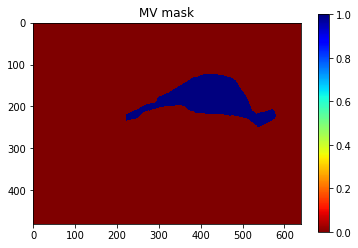

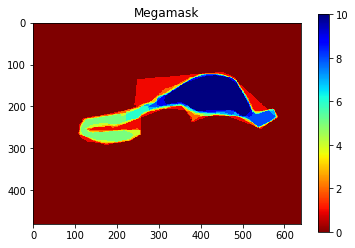

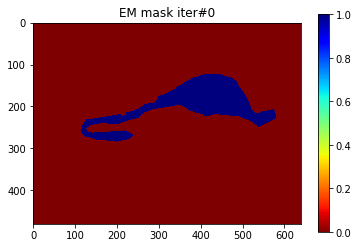

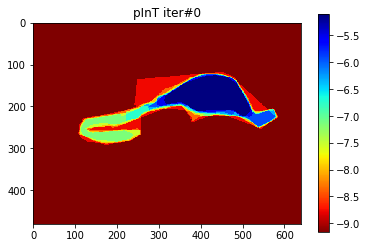

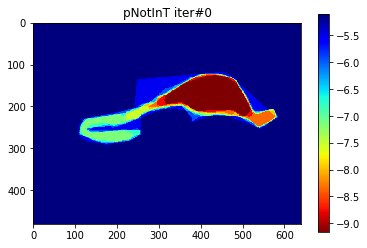

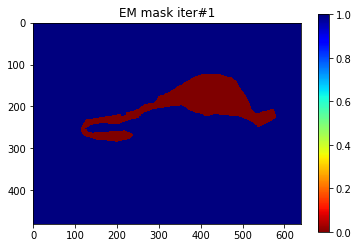

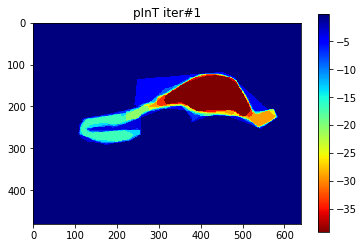

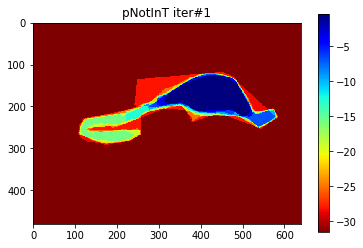

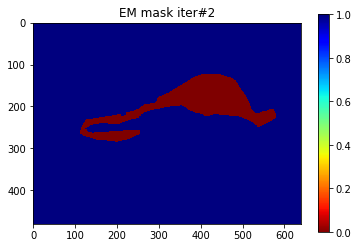

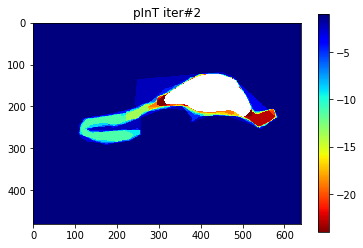

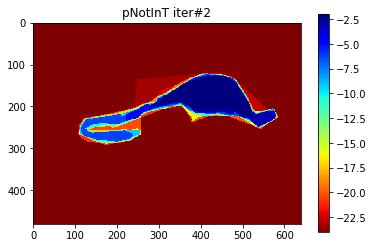

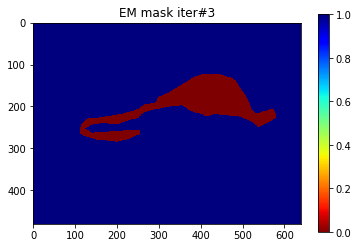

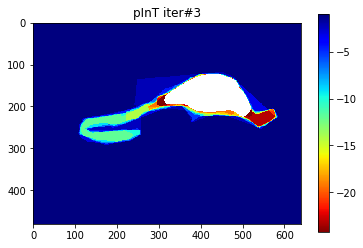

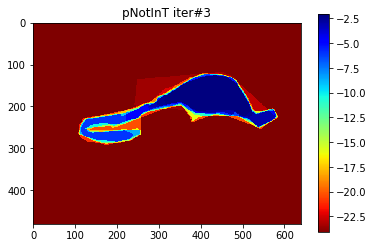

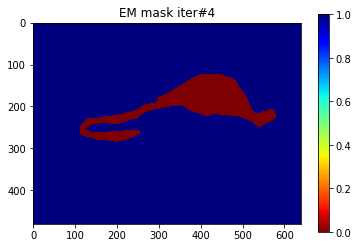

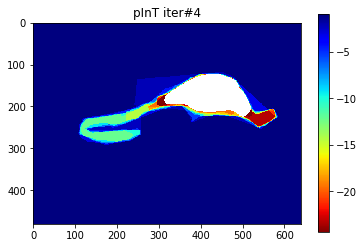

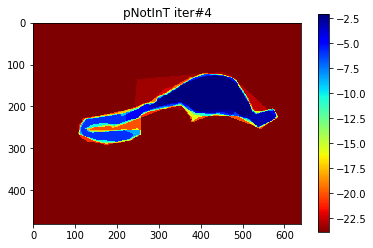

In [201]:
for iteration in range(5):
    plot_MV_EM_mask(8,10,5,'isoQjinitGT_',0,iteration)

In [205]:
mode="isoQjinitGT_"
test_sample_obj = [('10workers_rand5',8),('5workers_rand0',1)]
tbl = []
for test_sample in tqdm(test_sample_obj):
    sample_name= test_sample[0]
    objid = test_sample[1]
    outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample_name, objid)
    for thresh in [-4,-2,0,2,4]:
        #for it in range(5):
        it =4
        gt_est_mask = pkl.load(open(outdir+"{}gt_est_mask_{}_thresh{}.pkl".format(mode,it,thresh)))
        # Compute PR mask based on the EM estimate mask from every iteration
        [p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
        tbl.append([sample_name,objid,thresh,p,r,j])
df = pd.DataFrame(tbl,columns=["sample_name",'objid','thresh','P [{}]'.format(mode),'R [{}]'.format(mode),'J [{}]'.format(mode)])

In [207]:
df.merge(MV)

,sample_name,objid,thresh,P [isoQjinitGT_],R [isoQjinitGT_],J [isoQjinitGT_],P [MV],R [MV],J [MV]
0,10workers_rand5,8,-4,0.045479,0.522224,0.043662,0.973227,0.687816,0.675043
1,10workers_rand5,8,-2,0.032433,0.366889,0.030714,0.973227,0.687816,0.675043
2,10workers_rand5,8,0,0.011927,0.131751,0.011058,0.973227,0.687816,0.675043
3,10workers_rand5,8,2,0.008028,0.088235,0.007413,0.973227,0.687816,0.675043
4,10workers_rand5,8,4,0.000456,0.004779,0.000416,0.973227,0.687816,0.675043
5,5workers_rand0,1,-4,0.085234,1.000000,0.085234,0.977603,0.980179,0.958651
6,5workers_rand0,1,-2,0.007340,0.079323,0.006764,0.977603,0.980179,0.958651
7,5workers_rand0,1,0,0.001847,0.019821,0.001693,0.977603,0.980179,0.958651
8,5workers_rand0,1,2,0.000266,0.002826,0.000243,0.977603,0.980179,0.958651
9,5workers_rand0,1,4,0.000266,0.002826,0.000243,0.977603,0.980179,0.958651


In [235]:
qp = pkl.load(open("pixel_em/10workers_rand5/obj8/isoQjinitGT_qp_4_thresh0.pkl"))
qn = pkl.load(open("pixel_em/10workers_rand5/obj8/isoQjinitGT_qn_4_thresh0.pkl"))
worker_tbl = compare_qn_qp_w_GTJaccard(8,qn,qp)

 worker_id  Jaccard [Self]        qn        qp
        54        0.861646  0.257661  0.017252
       148        0.811349  0.343223  0.007297
       156        0.656011  0.015684  0.063955
       161        0.641127  0.066477  0.114176
       193        0.846011  0.350873  0.243170
       169        0.828900  0.432354  0.000000
       208        0.776597  0.020785  0.206534
       234        0.498127  0.013219  0.050932
       235        0.521902  0.047392  0.111930
       260        0.600180  0.229013  0.095502


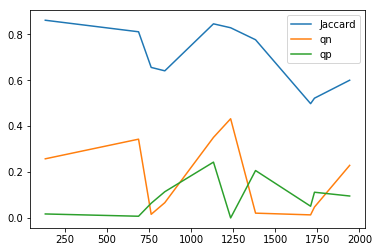

In [220]:
plt.plot(worker_tbl["Jaccard [Self]"],label='Jaccard')
plt.plot(worker_tbl["qn"],label='qn')
plt.plot(worker_tbl["qp"],label='qp')
plt.legend()

# Worker Jaccard 

In [190]:
worker_score = pd.read_csv('../computed_my_COCO_BBvals.csv',index_col=0)

In [252]:
def compare_qn_qp_w_GTJaccard(objid,qn,qp):
    worker_tbl = worker_score[(worker_score["object_id"]==objid )&(worker_score["worker_id"].isin(qn.keys()))][["worker_id","Precision [Self]","Recall [Self]","Jaccard [Self]"]]
    worker_tbl["qn"]=qn.values()
    worker_tbl["qp"]=qp.values()
    print worker_tbl.to_string(index=False)#,formatters= lambda x: "{:.2f}".format(x))
    return worker_tbl

# Compare GTLSA to GT / basic / MV 

In [ ]:
def plot_MV_EM_mask(object_id,Nworker,batch_num,mode,thresh,iteration):

In [ ]:
ls pixel_em/10workers_rand5/obj8/GTLSA_g

IOError: [Errno 2] No such file or directory: 'pixel_em/10workers_rand5/obj8/GTLSA_gt_est_mask_0_thresh-4.pkl'

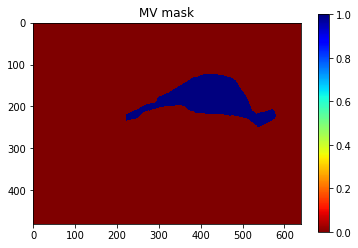

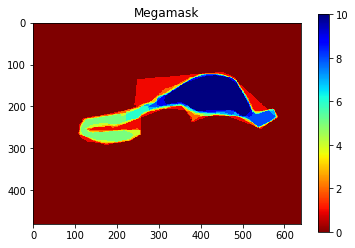

In [278]:
for iteration in range(5):
    plot_MV_EM_mask(8,10,5,'GTLSA_',-4,iteration)

### Fixed GT bug 

------------------------------------------------------------------------